<a href="https://colab.research.google.com/github/Hmd02/72_NotSlytherin_2/blob/main/72_NotSlytherin%5B2%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [502]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [503]:
df = pd.read_csv('/content/crop_production.csv')

In [504]:
df.drop_duplicates(inplace=True)

In [505]:
df.describe()

,Crop_Year,Area,Production
count,246090.000000,2.460900e+05,2.423600e+05
mean,2005.643017,1.200287e+04,5.825058e+05
std,4.952174,5.052350e+04,1.706585e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [506]:
df.head(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [507]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246090 entries, 0 to 246089
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246090 non-null  object 
 1   District_Name  246090 non-null  object 
 2   Crop_Year      246090 non-null  int64  
 3   Season         246090 non-null  object 
 4   Crop           246090 non-null  object 
 5   Area           246090 non-null  float64
 6   Production     242360 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.0+ MB


In [509]:
df_cont = df.select_dtypes(include = ['int64','float64'])

In [510]:
df_cat = df.select_dtypes(include =['object'])

,Total,Percent
Production,3730,1.515706
Crop_Year,0,0.000000
Area,0,0.000000


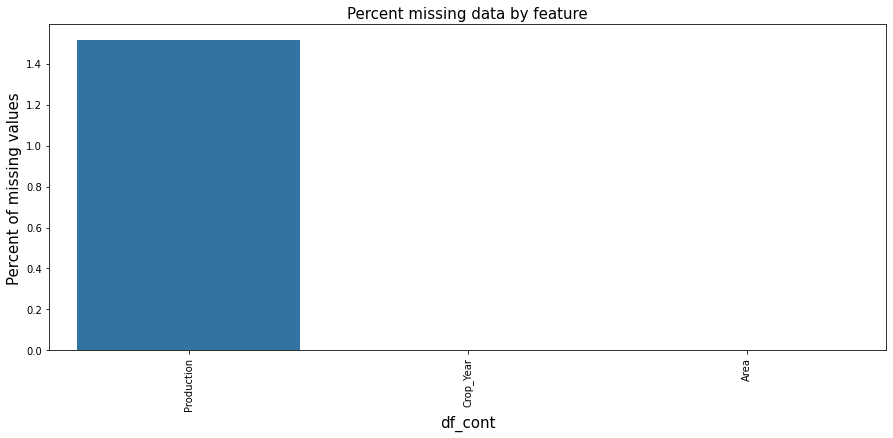

In [511]:
total = df_cont.isnull().sum().sort_values(ascending=False)
percent = df_cont.isnull().sum()/df_cont.isnull().count().sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('df_cont', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

In [517]:
df.dropna(subset=["Production"],axis=0,inplace=True)
print(df["Production"].isnull().sum())
df.rename({"SUBDIVISION:State_Name","Crop_Year:Year"})
df.to_csv('crop_production (1).csv')

In [521]:
data=pd.read_csv('/content/crop_production (1).csv')
rainfall=pd.read_csv("/content/rainfall.csv")

mergedStuff = pd.merge(data,rainfall, on=['State_Name','Crop_Year'], how='inner')
mergedStuff.to_csv('merged.csv')

In [513]:
# data["Production"]
# print(data.loc[data["State_Name"]=="Maharashtra",["Production","Crop_Year"]])
Rice_year_Maharashtra=data.loc[(data["State_Name"]=="Maharashtra") & (data["Crop"]=="Rice"),:]
# plt.plot(Rice_year_Maharashtra["Crop_Year"],Rice_year_Maharashtra["Production"])
# print(Rice_year_Maharashtra["Production"].unique())

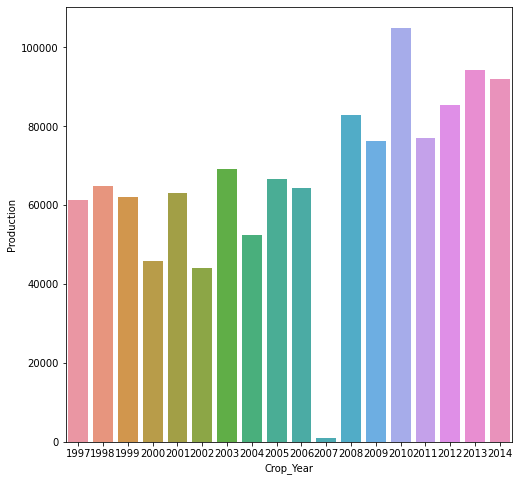

In [514]:
# plt.xlabel(Rice_year_Maharashtra["Crop_Year"])
# plt.ylabel(Rice_year_Maharashtra["Production"])
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=Rice_year_Maharashtra["Crop_Year"],y=Rice_year_Maharashtra["Production"],ax=ax,ci=None)

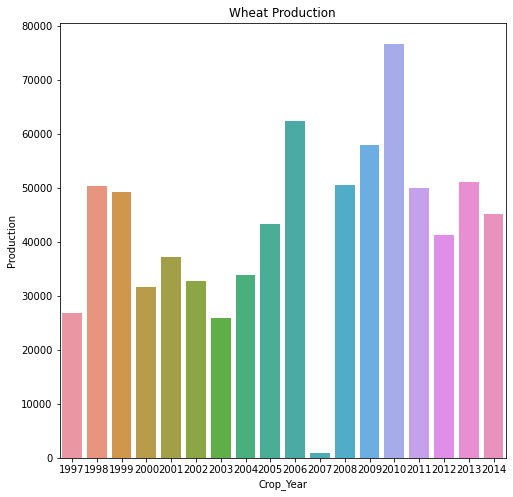

In [515]:
Wheat_year_Maharashtra=data.loc[(data["State_Name"]=="Maharashtra") & (data["Crop"]=="Wheat"),:]
fig, ax = plt.subplots(figsize=(8, 8))
ax.set(xlabel='Year', ylabel='Production',title='Wheat Production')
sns.barplot(x=Wheat_year_Maharashtra["Crop_Year"],y=Wheat_year_Maharashtra["Production"],ax=ax,ci=None)

In [516]:
df["Production"].isna().sum()

3730